In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [49]:
df = pd.read_csv('metadata.csv')

In [50]:
df.columns

Index(['_id', 'name', 'meta.clinical.age_approx',
       'meta.clinical.anatom_site_general', 'meta.clinical.benign_malignant',
       'meta.clinical.clin_size_long_diam_mm', 'meta.clinical.diagnosis',
       'meta.clinical.diagnosis_confirm_type', 'meta.clinical.family_hx_mm',
       'meta.clinical.lesion_id', 'meta.clinical.mel_class',
       'meta.clinical.mel_mitotic_index', 'meta.clinical.mel_thick_mm',
       'meta.clinical.mel_type', 'meta.clinical.mel_ulcer',
       'meta.clinical.melanocytic', 'meta.clinical.nevus_type',
       'meta.clinical.patient_id', 'meta.clinical.personal_hx_mm',
       'meta.clinical.sex', 'meta.acquisition.acquisition_day',
       'meta.acquisition.blurry', 'meta.acquisition.color_tint',
       'meta.acquisition.dermoscopic_type', 'meta.acquisition.hairy',
       'meta.acquisition.image_type', 'meta.acquisition.marker_pen',
       'meta.acquisition.pixelsX', 'meta.acquisition.pixelsY'],
      dtype='object')

In [51]:
df.shape

(21658, 29)

In [52]:
df.count()

_id                                     21658
name                                    21658
meta.clinical.age_approx                21263
meta.clinical.anatom_site_general       10112
meta.clinical.benign_malignant          21658
meta.clinical.clin_size_long_diam_mm     1519
meta.clinical.diagnosis                 21429
meta.clinical.diagnosis_confirm_type    21259
meta.clinical.family_hx_mm               1497
meta.clinical.lesion_id                     0
meta.clinical.mel_class                    37
meta.clinical.mel_mitotic_index             0
meta.clinical.mel_thick_mm                 37
meta.clinical.mel_type                      0
meta.clinical.mel_ulcer                     0
meta.clinical.melanocytic               21429
meta.clinical.nevus_type                  580
meta.clinical.patient_id                    0
meta.clinical.personal_hx_mm             1517
meta.clinical.sex                       21256
meta.acquisition.acquisition_day            0
meta.acquisition.blurry           

In [53]:
# Some columns don't contain enouth data, so they will be excluded from further analysis
df = df[['meta.clinical.age_approx', 'meta.clinical.benign_malignant', 'meta.clinical.diagnosis', 
         'meta.clinical.sex', 'meta.acquisition.image_type']]

In [54]:
df = df.rename(columns={'meta.clinical.age_approx': 'Age',
                   'meta.clinical.benign_malignant': "benign/malignant", 
                   'meta.clinical.diagnosis': 'Diagnosis', 
                   'meta.clinical.sex': 'Sex',
                   'meta.acquisition.image_type': 'Image_type'})

Text(0.5, 1.0, 'Age distribution')

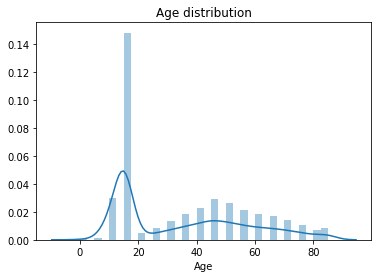

In [55]:
sns.distplot(df['Age'])
plt.title('Age distribution')

Text(0.5, 1.0, 'Age distribution (malignant)')

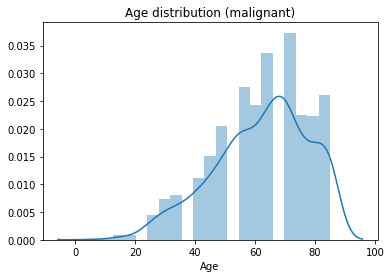

In [56]:
sns.distplot(df['Age'][df['benign/malignant'] !='benign'])
plt.title('Age distribution (malignant)')

Text(0.5, 1.0, 'Age distribution (benign)')

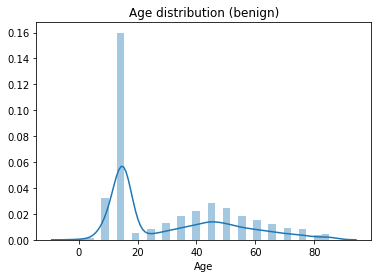

In [57]:
sns.distplot(df['Age'][df['benign/malignant'] =='benign'])
plt.title('Age distribution (benign)')

In [58]:
# Number of patients by age group
df['Age'].groupby(df["Age"]).count()

Age
0.0       33
5.0       87
10.0    1597
15.0    7862
20.0     256
25.0     454
30.0     716
35.0     964
40.0    1200
45.0    1534
50.0    1385
55.0    1145
60.0     964
65.0     890
70.0     763
75.0     580
80.0     378
85.0     455
Name: Age, dtype: int64

In [59]:
df['Age'][df['benign/malignant'] =='benign'].mean()

31.51682742713357

In [60]:
df['Age'][df['benign/malignant'] =='benign'].median()

15.0

In [61]:
df['Age'][df['benign/malignant'] !='benign'].mean()

61.99359853680841

In [62]:
df['Age'][df['benign/malignant'] !='benign'].median()

65.0

In [79]:
# Number of patients with different diagnosis
df.groupby(["Diagnosis", 'benign/malignant']).count()

Age    Sex  Image_type
Diagnosis                          benign/malignant                          
actinic keratosis                  benign                2      2           2
angiofibroma or fibrous papule     benign                1      1           1
angioma                            benign               15     14          15
atypical melanocytic proliferation benign                2      2           2
basal cell carcinoma               benign                1      1           1
                                   malignant            67     67          67
dermatofibroma                     benign                7      5           7
lentigo NOS                        benign               71     71          71
lentigo simplex                    benign               27     27          27
lichenoid keratosis                benign                1      1           1
melanoma                           malignant          2071   2067        2169
nevus                              benign            18267  18310       18558
other                              benign               10     10          10
scar                               benign                1      1           1
seborrheic keratosis               benign              413    416         418
                                   malignant             1      1           1
solar lentigo                      benign               57     57          57
squamous cell carcinoma            malignant            21     21          21

In [81]:
# Number of patients with different diagnosis
df.groupby(['benign/malignant', "Sex"]).count()

Age  Diagnosis  Image_type
benign/malignant Sex                                 
benign           female   8029       7995        8052
                 male    10997      10923       11023
malignant        female    816        813         819
                 male     1361       1343        1362

In [90]:
df.groupby(df["Sex"]).count() / df.Age.count()

,Age,benign/malignant,Diagnosis,Image_type
Sex,,,,
female,0.415981,0.417204,0.414241,0.417204
male,0.581197,0.582467,0.576871,0.582467


In [92]:
# Number of patients by different image types
df.groupby(["Image_type", 'benign/malignant']).count()

Age  Diagnosis    Sex
Image_type  benign/malignant                         
clinical    malignant            88         88     88
dermoscopic benign            19076      19171  19075
            malignant          2099       2170   2093